# 10分钟入门pandas

### 公众号：早起Python
### 编译：刘早起

教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改

[最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

## 目录
* [创建数据](#创建数据)
* [数据查看](#数据查看)
* [数据选取](#数据选取)
    - [ 使用\[\]选取数据 ](#使用\[\]选取数据)
    - [通过标签选取数据](#通过标签选取数据)
    - [通过位置选取数据](#通过位置选取数据)
    - [使用布尔索引](#使用布尔索引)
    - [修改数据](#修改数据)
* [缺失值处理](#缺失值处理)
    - [reindex](#reindex)
    - [删除缺失值](#删除缺失值)
    - [填充缺失值](#删除缺失值)
* [常用操作](#常用操作)
    - [统计](#统计)
    - [Apply函数](#Apply函数)
    - [value_counts()](#value_counts())
    - [字符串方法](#字符串方法)
* [数据合并](#数据合并)
    - [Concat](#Concat)
    - [Join](#Join)
    - [Append](#Append)
* [数据分组](#数据分组)
* [数据重塑](#数据重塑)
    - [数据堆叠](#数据堆叠)
    - [数据透视表](#数据透视表)
* [时间序列](#时间序列)
* [灵活的使用分类数据](#灵活的使用分类数据)
* [数据可视化](#数据可视化)
* [导入导出数据](#导入导出数据)
* [获得帮助](#获得帮助)

首先导入Python数据处理中常用的三个库

如果没有可以分别执行下方代码框安装

In [ ]:
#安装pandas
!pip install pandas

In [ ]:
#安装numpy
!pip install numpy

In [ ]:
#安装matplotlib
!pip install matoplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

[返回目录](#目录)

使用pd.Series创建Series对象

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [6]:
dates = pd.date_range('20130101', periods=6)

In [7]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-0.469364,-1.389291,0.844032,0.042866
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-03,-0.192426,1.740765,0.730479,-1.320781
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883
2013-01-05,0.233021,0.619112,0.628579,-0.802585
2013-01-06,0.493946,0.848247,1.633055,-0.740562


通过字典创建DataFrame对象

In [4]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [11]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

[返回目录](#目录)

下面分别是查看数据的顶部和尾部的方法

In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.469364,-1.389291,0.844032,0.042866
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-03,-0.192426,1.740765,0.730479,-1.320781
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883
2013-01-05,0.233021,0.619112,0.628579,-0.802585


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883
2013-01-05,0.233021,0.619112,0.628579,-0.802585
2013-01-06,0.493946,0.848247,1.633055,-0.740562


查看DataFrame对象的索引，列名，数据信息

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-0.46936354, -1.38929068,  0.84403157,  0.04286594],
       [ 0.98657633, -0.68954348, -0.38326456, -1.10493201],
       [-0.19242554,  1.74076522,  0.73047859, -1.32078058],
       [ 0.04734752, -1.95230265, -0.6915437 , -1.40388308],
       [ 0.23302102,  0.61911183,  0.628579  , -0.80258543],
       [ 0.49394583,  0.84824737,  1.633055  , -0.74056229]])

描述性统计

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.183184,-0.137169,0.460223,-0.888313
std,0.515722,1.430893,0.855835,0.528401
min,-0.469364,-1.952303,-0.691544,-1.403883
25%,-0.132482,-1.214354,-0.130304,-1.266818
50%,0.140184,-0.035216,0.679529,-0.953759
75%,0.428715,0.790963,0.815643,-0.756068
max,0.986576,1.740765,1.633055,0.042866


数据转置

In [20]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.469364,0.986576,-0.192426,0.047348,0.233021,0.493946
B,-1.389291,-0.689543,1.740765,-1.952303,0.619112,0.848247
C,0.844032,-0.383265,0.730479,-0.691544,0.628579,1.633055
D,0.042866,-1.104932,-1.320781,-1.403883,-0.802585,-0.740562


根据列名排序

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.042866,0.844032,-1.389291,-0.469364
2013-01-02,-1.104932,-0.383265,-0.689543,0.986576
2013-01-03,-1.320781,0.730479,1.740765,-0.192426
2013-01-04,-1.403883,-0.691544,-1.952303,0.047348
2013-01-05,-0.802585,0.628579,0.619112,0.233021
2013-01-06,-0.740562,1.633055,0.848247,0.493946


根据B列数值排序

In [22]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883
2013-01-01,-0.469364,-1.389291,0.844032,0.042866
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-05,0.233021,0.619112,0.628579,-0.802585
2013-01-06,0.493946,0.848247,1.633055,-0.740562
2013-01-03,-0.192426,1.740765,0.730479,-1.320781


## 数据选取

[返回目录](#目录)

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [23]:
df['A']

2013-01-01   -0.469364
2013-01-02    0.986576
2013-01-03   -0.192426
2013-01-04    0.047348
2013-01-05    0.233021
2013-01-06    0.493946
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.469364,-1.389291,0.844032,0.042866
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-03,-0.192426,1.740765,0.730479,-1.320781


In [25]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-03,-0.192426,1.740765,0.730479,-1.320781
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883


### 通过标签选取数据

In [26]:
df.loc[dates[0]]

A   -0.469364
B   -1.389291
C    0.844032
D    0.042866
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.469364,-1.389291
2013-01-02,0.986576,-0.689543
2013-01-03,-0.192426,1.740765
2013-01-04,0.047348,-1.952303
2013-01-05,0.233021,0.619112
2013-01-06,0.493946,0.848247


In [28]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.986576,-0.689543
2013-01-03,-0.192426,1.740765
2013-01-04,0.047348,-1.952303


In [29]:
df.loc['20130102',['A','B']]

A    0.986576
B   -0.689543
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0],'A']

-0.46936353804430075

In [31]:
df.at[dates[0],'A']

-0.46936353804430075

### 通过位置选取数据

In [32]:
df.iloc[3]

A    0.047348
B   -1.952303
C   -0.691544
D   -1.403883
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.047348,-1.952303
2013-01-05,0.233021,0.619112


In [34]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.986576,-0.383265
2013-01-03,-0.192426,0.730479
2013-01-05,0.233021,0.628579


In [35]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-03,-0.192426,1.740765,0.730479,-1.320781


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.389291,0.844032
2013-01-02,-0.689543,-0.383265
2013-01-03,1.740765,0.730479
2013-01-04,-1.952303,-0.691544
2013-01-05,0.619112,0.628579
2013-01-06,0.848247,1.633055


In [37]:
df.iloc[1, 1]

-0.689543482094678

In [38]:
df.iat[1, 1]

-0.689543482094678

### 使用布尔索引 

In [39]:
df[df.A>0]

,A,B,C,D
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883
2013-01-05,0.233021,0.619112,0.628579,-0.802585
2013-01-06,0.493946,0.848247,1.633055,-0.740562


In [40]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.844032,0.042866
2013-01-02,0.986576,NaN,NaN,NaN
2013-01-03,NaN,1.740765,0.730479,NaN
2013-01-04,0.047348,NaN,NaN,NaN
2013-01-05,0.233021,0.619112,0.628579,NaN
2013-01-06,0.493946,0.848247,1.633055,NaN


In [41]:
df2 = df.copy()

In [42]:
df2['E'] = ['one', 'one','two','three','four','three']

In [43]:
df2

,A,B,C,D,E
2013-01-01,-0.469364,-1.389291,0.844032,0.042866,one
2013-01-02,0.986576,-0.689543,-0.383265,-1.104932,one
2013-01-03,-0.192426,1.740765,0.730479,-1.320781,two
2013-01-04,0.047348,-1.952303,-0.691544,-1.403883,three
2013-01-05,0.233021,0.619112,0.628579,-0.802585,four
2013-01-06,0.493946,0.848247,1.633055,-0.740562,three


In [44]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.192426,1.740765,0.730479,-1.320781,two
2013-01-05,0.233021,0.619112,0.628579,-0.802585,four


### 修改数据

添加新列并自动按索引对齐数据

In [45]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1

In [48]:
df.at[dates[0], 'A'] = 0

In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, 'D'] = np.array([5] * len(df)) 

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.844032,5,NaN
2013-01-02,0.986576,-0.689543,-0.383265,5,1.0
2013-01-03,-0.192426,1.740765,0.730479,5,2.0
2013-01-04,0.047348,-1.952303,-0.691544,5,3.0
2013-01-05,0.233021,0.619112,0.628579,5,4.0
2013-01-06,0.493946,0.848247,1.633055,5,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.844032,-5,NaN
2013-01-02,-0.986576,-0.689543,-0.383265,-5,-1.0
2013-01-03,-0.192426,-1.740765,-0.730479,-5,-2.0
2013-01-04,-0.047348,-1.952303,-0.691544,-5,-3.0
2013-01-05,-0.233021,-0.619112,-0.628579,-5,-4.0
2013-01-06,-0.493946,-0.848247,-1.633055,-5,-5.0


## 缺失值处理

缺失值处理是Pandas数据处理的一部分，以下仅展示了部分操作

有关缺失值的处理可以查看下面两篇文章：

- [Pandas缺失值处理详细方法详解](https://mp.weixin.qq.com/s/b1TgSiJb4OsmJLiZh4JNyg)
- [Pandas解决常见缺失值](https://mp.weixin.qq.com/s/YOsr8MIAporfl7Ew0xsm8Q)

[返回目录](#目录)

### reindex

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.844032,5,NaN,1.0
2013-01-02,0.986576,-0.689543,-0.383265,5,1.0,1.0
2013-01-03,-0.192426,1.740765,0.730479,5,2.0,NaN
2013-01-04,0.047348,-1.952303,-0.691544,5,3.0,NaN


### 删除缺失值
舍弃含有NaN的行

In [58]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.986576,-0.689543,-0.383265,5,1.0,1.0


### 填充缺失值
填充缺失数据

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.844032,5,5.0,1.0
2013-01-02,0.986576,-0.689543,-0.383265,5,1.0,1.0
2013-01-03,-0.192426,1.740765,0.730479,5,2.0,5.0
2013-01-04,0.047348,-1.952303,-0.691544,5,3.0,5.0


In [60]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

[返回目录](#目录)

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [61]:
df.mean()

A    0.261411
B    0.094380
C    0.460223
D    5.000000
F    3.000000
dtype: float64

横向求均值

In [62]:
df.mean(1)

2013-01-01    1.461008
2013-01-02    1.182754
2013-01-03    1.855764
2013-01-04    1.080700
2013-01-05    2.096142
2013-01-06    2.595050
Freq: D, dtype: float64

In [63]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.192426,0.740765,-0.269521,4.0,1.0
2013-01-04,-2.952652,-4.952303,-3.691544,2.0,0.0
2013-01-05,-4.766979,-4.380888,-4.371421,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply函数

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.844032,5,NaN
2013-01-02,0.986576,-0.689543,0.460767,10,1.0
2013-01-03,0.794151,1.051222,1.191246,15,3.0
2013-01-04,0.841498,-0.901081,0.499702,20,6.0
2013-01-05,1.074519,-0.281969,1.128281,25,10.0
2013-01-06,1.568465,0.566278,2.761336,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    1.179002
B    3.693068
C    2.324599
D    0.000000
F    4.000000
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    6
1    1
2    4
3    6
4    3
5    2
6    3
7    5
8    2
9    2
dtype: int64

In [70]:
s.value_counts()

2    3
6    2
3    2
5    1
4    1
1    1
dtype: int64

### 字符串方法

In [71]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

[返回目录](#目录)

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于数据合并的操作，

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！


### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,0.413620,-1.114527,0.322678,1.207744
1,-1.812499,-1.338866,0.611622,0.445057
2,0.365098,0.177919,0.823212,1.529158
3,-0.803774,-1.422255,1.411392,0.400721
4,0.732753,1.413181,-0.338617,0.088442
5,-0.509033,-1.237311,1.021978,-0.596258
6,0.841053,-0.404684,1.528639,-0.273577
7,0.966884,-2.142516,1.041670,0.109264
8,2.231267,2.011625,0.601062,0.533928
9,-0.134641,0.165157,-1.236827,1.681187


In [75]:
pieces = [df[:3], df[3:6], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,0.413620,-1.114527,0.322678,1.207744
1,-1.812499,-1.338866,0.611622,0.445057
2,0.365098,0.177919,0.823212,1.529158
3,-0.803774,-1.422255,1.411392,0.400721
4,0.732753,1.413181,-0.338617,0.088442
5,-0.509033,-1.237311,1.021978,-0.596258
7,0.966884,-2.142516,1.041670,0.109264
8,2.231267,2.011625,0.601062,0.533928
9,-0.134641,0.165157,-1.236827,1.681187


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [77]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [78]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [82]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [83]:
df

,A,B,C,D
0,-0.142659,-0.941171,-0.186519,-0.811977
1,0.584561,0.177886,-0.190396,0.664233
2,-1.807829,0.268193,0.683990,0.477042
3,-1.474986,-1.098600,-0.038280,2.087236
4,1.906703,0.678425,-0.090156,-0.444430
5,0.329748,1.110306,0.713732,-0.714841
6,1.218329,-0.376264,0.389029,-1.526025
7,0.423347,1.821127,-1.795346,-0.795738


In [84]:
s = df.iloc[3]

In [85]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.142659,-0.941171,-0.186519,-0.811977
1,0.584561,0.177886,-0.190396,0.664233
2,-1.807829,0.268193,0.683990,0.477042
3,-1.474986,-1.098600,-0.038280,2.087236
4,1.906703,0.678425,-0.090156,-0.444430
5,0.329748,1.110306,0.713732,-0.714841
6,1.218329,-0.376264,0.389029,-1.526025
7,0.423347,1.821127,-1.795346,-0.795738
8,-1.474986,-1.098600,-0.038280,2.087236


## 数据分组

[返回目录](#目录)

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [16]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.265025,-0.811272
1,bar,one,-0.678856,-1.826054
2,foo,two,-0.758057,1.530790
3,bar,three,1.938142,0.145760
4,foo,two,-0.921081,-0.199023
5,bar,two,1.543296,-0.462012
6,foo,one,0.431949,-1.662286
7,foo,three,1.197985,1.183591


In [88]:
df.groupby('A').sum()

,C,D
A,,
bar,1.053451,-1.268663
foo,0.531394,-1.414245


In [89]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.195757 -0.187145
    three -0.587003 -0.200543
    two    0.444696 -0.880975
foo one   -1.087541 -0.301457
    three  0.272196  0.016167
    two    1.346739 -1.128956

## 数据重塑

详细教程请参阅[分层索引和重塑](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical)部分。

[返回目录](#目录)

### 数据堆叠
可以进行数据压缩

In [90]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [91]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [92]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [93]:
df2 = df[:4]

In [94]:
df2

A         B
first second                    
bar   one    -0.625492  2.471493
      two     0.934708  1.595349
baz   one     0.686079  0.279957
      two     0.039190 -0.534317

In [95]:
stacked = df2.stack()

In [96]:
stacked

first  second   
bar    one     A   -0.625492
               B    2.471493
       two     A    0.934708
               B    1.595349
baz    one     A    0.686079
               B    0.279957
       two     A    0.039190
               B   -0.534317
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [97]:
stacked.unstack()

A         B
first second                    
bar   one    -0.625492  2.471493
      two     0.934708  1.595349
baz   one     0.686079  0.279957
      two     0.039190 -0.534317

In [98]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.625492  0.934708
      B  2.471493  1.595349
baz   A  0.686079  0.039190
      B  0.279957 -0.534317

In [99]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.625492  0.686079
       B  2.471493  0.279957
two    A  0.934708  0.039190
       B  1.595349 -0.534317

### 数据透视表

Pandas中实现数据透视表很简单，但是相比之下并没有Excel灵活，可以查看我的文章
- [我用Python展示Excel中常用的20个操作](https://mp.weixin.qq.com/s/QuElbK6LhtgtmRXRiVMV5A)

In [100]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [101]:
df

,A,B,C,D,E
0,one,A,foo,-0.072719,-0.034173
1,one,B,foo,1.262336,-0.907695
2,two,C,foo,0.093161,-1.516473
3,three,A,bar,0.190056,0.481209
4,one,B,bar,1.319855,0.255924
5,one,C,bar,0.374758,-0.019331
6,two,A,foo,-1.019282,0.673759
7,three,B,foo,-1.526206,-0.521203
8,one,C,foo,1.600168,1.632461
9,one,A,bar,-2.410462,-0.271305


In [102]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A -2.410462 -0.072719
      B  1.319855  1.262336
      C  0.374758  1.600168
three A  0.190056       NaN
      B       NaN -1.526206
      C -1.367669       NaN
two   A       NaN -1.019282
      B  0.387701       NaN
      C       NaN  0.093161

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

[返回目录](#目录)

时区表示

In [103]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [104]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [105]:
ts.resample('5Min').sum()

2012-01-01    27339
Freq: 5T, dtype: int64

In [106]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [107]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [108]:
ts

2012-03-06   -0.118691
2012-03-07   -1.424038
2012-03-08    0.377441
2012-03-09   -1.116195
2012-03-10    1.180595
Freq: D, dtype: float64

In [109]:
ts_utc = ts.tz_localize('UTC')

In [110]:
ts_utc

2012-03-06 00:00:00+00:00   -0.118691
2012-03-07 00:00:00+00:00   -1.424038
2012-03-08 00:00:00+00:00    0.377441
2012-03-09 00:00:00+00:00   -1.116195
2012-03-10 00:00:00+00:00    1.180595
Freq: D, dtype: float64

时区转换

In [111]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.118691
2012-03-06 19:00:00-05:00   -1.424038
2012-03-07 19:00:00-05:00    0.377441
2012-03-08 19:00:00-05:00   -1.116195
2012-03-09 19:00:00-05:00    1.180595
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [112]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [113]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [114]:
ts

2012-01-31    1.138201
2012-02-29    0.677539
2012-03-31    0.272933
2012-04-30   -0.238112
2012-05-31   -1.122162
Freq: M, dtype: float64

In [115]:
ps = ts.to_period()

In [116]:
ps

2012-01    1.138201
2012-02    0.677539
2012-03    0.272933
2012-04   -0.238112
2012-05   -1.122162
Freq: M, dtype: float64

In [117]:
ps.to_timestamp()

2012-01-01    1.138201
2012-02-01    0.677539
2012-03-01    0.272933
2012-04-01   -0.238112
2012-05-01   -1.122162
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [118]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [119]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [120]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [121]:
ts.head()

1990-03-01 09:00   -1.555191
1990-06-01 09:00    1.535344
1990-09-01 09:00   -0.092187
1990-12-01 09:00    1.285081
1991-03-01 09:00    1.130063
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

[返回目录](#目录)

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [122]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [123]:
df['grade'] = df['raw_grade'].astype("category")

In [124]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [125]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [126]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [127]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [128]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [129]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

[返回目录](#目录)

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于数据可视化的操作，

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！


In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [7]:
ts.head()

2000-01-01   -1.946554
2000-01-02   -0.354670
2000-01-03    0.361473
2000-01-04   -0.109408
2000-01-05    0.877671
Freq: D, dtype: float64

In [8]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

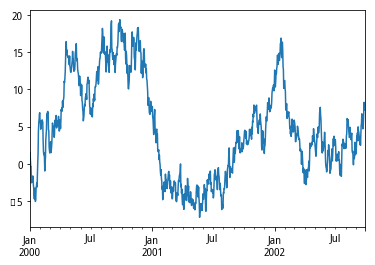

In [132]:
ts.plot()

In [133]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [134]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

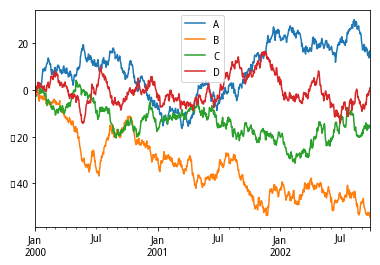

In [135]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

[返回目录](#目录)

**将数据写入`csv`，如果有中文需要注意编码**

In [136]:
df.to_csv('foo.csv')

从`csv`中读取数据

In [137]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.640246,-1.846295,-0.181754,0.981574
1,2000-01-02,-1.580720,-2.382281,-0.745580,0.175213
2,2000-01-03,-2.745502,-1.809188,-0.371424,-0.724011
3,2000-01-04,-2.576642,-1.287329,-0.615925,-1.154665
4,2000-01-05,-2.442921,-0.481561,-0.283864,0.068934


将数据导出为`hdf`格式

In [138]:
df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [139]:
pd.read_hdf('foo.h5','df').head()

,A,B,C,D
2000-01-01,-0.640246,-1.846295,-0.181754,0.981574
2000-01-02,-1.580720,-2.382281,-0.745580,0.175213
2000-01-03,-2.745502,-1.809188,-0.371424,-0.724011
2000-01-04,-2.576642,-1.287329,-0.615925,-1.154665
2000-01-05,-2.442921,-0.481561,-0.283864,0.068934


将数据保存为`xlsx`格式

In [140]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [141]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,-0.640246,-1.846295,-0.181754,0.981574
2000-01-02,-1.580720,-2.382281,-0.745580,0.175213
2000-01-03,-2.745502,-1.809188,-0.371424,-0.724011
2000-01-04,-2.576642,-1.287329,-0.615925,-1.154665
2000-01-05,-2.442921,-0.481561,-0.283864,0.068934


## 获得帮助

如果你在使用Pandas的过程中遇到了错误，就像下面一样：
```
>>> if pd.Series([False, T`mrue, False]):
...     print("I was true")
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
```
可以查阅[相关解释](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-compare)来了解该如何解决！

有任何疑问也可以扫描下方二维码关注我的公众号联系：
![](http://liuzaoqi.oss-cn-beijing.aliyuncs.com/2020/09/04/15992257340774.jpg?域名/sample.jpg?x-oss-process=style/stylename)·